In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from utils import read_anomaly_file, anomaly_to_pd

In [4]:
data_path = "../data/realKnownCause/machine_temperature_system_failure.csv"
full_data = pd.read_csv(data_path, parse_dates=["timestamp"], header=0)
limit_warmup = "2013-12-14"
warmup_data = full_data[full_data["timestamp"] <= limit_warmup]
learning_data = full_data[full_data["timestamp"] > limit_warmup]

In [5]:
osvm = anomaly_to_pd('./results/osvm_machine_failures.txt')
omp = anomaly_to_pd('./results/omp_machine_failures.txt')

In [6]:
def plot_ts_denoised(df,date_col, col, pts=None, isof=None, discords=None):
    fig,axs = plt.subplots(2, figsize=(20,6))
    axs[0].plot(df[date_col], df[col].values)
    axs[1].plot(df[date_col], df[col].values)
    #axs[2].plot(left_mp)
    if pts != None:
        ano = df.loc[df[date_col].isin(pts)]
        axs[0].scatter(ano[date_col],ano[col],color="red",marker="*")
    #if isof != None:
    #    iso = df.loc[df.index.isin(isof)]
    #    axs[1].scatter(iso[date_col],iso[col],color="green",marker='o')
    if discords!=None:
        mp_ano = df.loc[df[date_col].isin(discords)]
        axs[1].scatter(mp_ano[date_col],mp_ano[col],color="black",marker='*', s=200)
    #    axs[2].scatter(discords,left_mp[discords],color="black",marker='*',s=200)

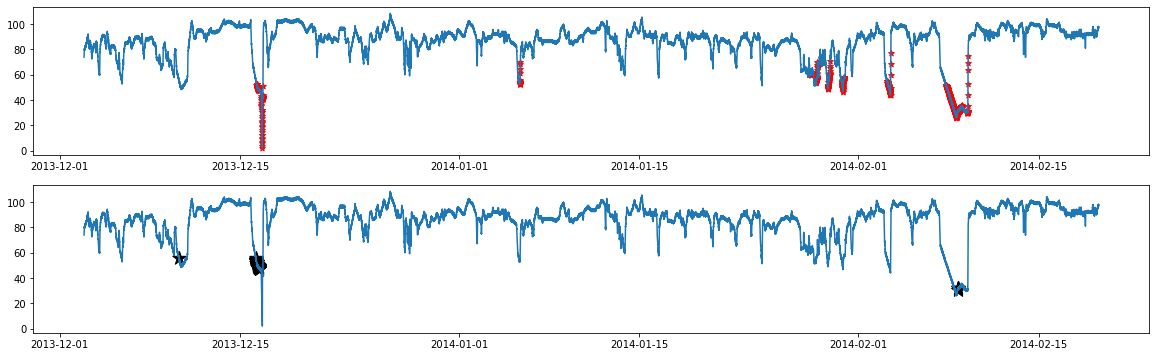

In [7]:
plot_ts_denoised(full_data, "timestamp","value",list(osvm.timestamp.values), discords=list(omp.timestamp.values))